# Robust Principal Component Analysis(RPCA)

- Decompose a matrix into low-rank and sparse components
$$ M = L + S $$
- where $L$ is low-rank and $S$ is sparse
- Used VIRAT dataset to test the algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## 1. Data Load
- Load the matrix(numpy) data from the video file
- Used `cv2.VideoCapture`

In [10]:
from src.Converter import convert_video

data = convert_video("data/sample1.mp4", gray=True)

# reduce number of frame and resolution
frame_ratio = 0.1
resolution_ratio = 0.1

data = data[::int(1/frame_ratio), ::int(1/resolution_ratio), ::int(1/resolution_ratio)]

data = data.reshape(data.shape[0], -1).T
print("Converted shape : ", data.shape)

Video is read successfully.
Shape :  (584, 720, 1280)
Converted shape :  (9216, 59)


## RPCA Result

In [12]:
# Load algorithm and set seed
np.random.seed(0)

### Parameters
- $r$ : rank of low-rank approximation $L$
- $\gamma$ : Value between 0 and 1 corresponding to percentile for the hard thresholding procedure
- retraction : Retraction method for the Riemannian optimization

In [13]:
# Set parameters
r = 3
gamma = 0.1
retraction = "orthographic"
maxiter = 100
stepsize = 0.5

In [14]:
# Run algorithm
from morpca import morpca

result = morpca(data, r, gamma, retraction, maxiter, stepsize, verbose=True)

Iteration 0: Objective value =  88970.01489827907
Iteration 1: Objective value =  83767.93492893642
Iteration 2: Objective value =  86266.32355327798
Iteration 3: Objective value =  87840.33064678035
Iteration 4: Objective value =  88720.66225319494
Iteration 5: Objective value =  89195.0438282461
Iteration 6: Objective value =  89448.48645536038
Iteration 7: Objective value =  89583.88571525898
Iteration 8: Objective value =  89657.66949256325
Iteration 9: Objective value =  89698.79386136749
Iteration 10: Objective value =  89722.92476922201
Iteration 11: Objective value =  89737.74864862596
Iteration 12: Objective value =  89747.66769232298
Iteration 13: Objective value =  89754.86343074005
Iteration 14: Objective value =  89761.08355795064
Iteration 15: Objective value =  89766.6920516383
Iteration 16: Objective value =  89771.65157491622
Iteration 17: Objective value =  89776.3789773794
Iteration 18: Objective value =  89780.96605888513
Iteration 19: Objective value =  89785.24349

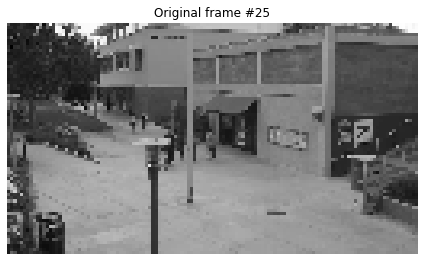

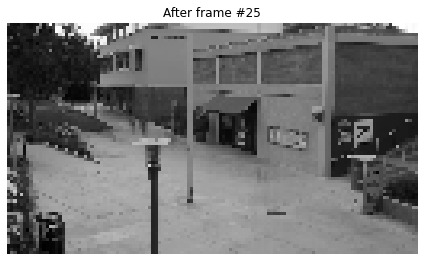

In [32]:
# Visualize before treatment
frame = 25

plt.imshow(data.T[frame].reshape(int(720*resolution_ratio),int(1280*resolution_ratio)), cmap='gray')
plt.axis('off')
plt.title(f'Original frame #{frame}')
plt.tight_layout()
plt.savefig(f'plots/before_frame{frame}.png', bbox_inches='tight', pad_inches=0.1, facecolor='white')
plt.show()

# Visualize results
result_L = result['solution'][-1]

plt.imshow(result_L.T[frame].reshape(int(720*resolution_ratio),int(1280*resolution_ratio)), cmap='gray')
plt.axis('off')
plt.title(f'After frame #{frame}')
plt.tight_layout()
plt.savefig(f"plots/result_frame{frame}.png", bbox_inches='tight', pad_inches=0.1, facecolor='white')
plt.show()

In [16]:
# Save results
np.save("data/result.npy", result['solution'])